#### 1.Concat

* pd.Series(): 1차원 배열 형태의 데이터를 담는 pandas 객체로, 리스트나 배열 등을 인덱스와 함께 열(column) 없이 생성할 때 사용한다.
* pd.DataFrame(): 2차원 표 형식의 데이터를 담는 pandas 객체로, 딕셔너리·리스트·넘파이 배열·다른 DataFrame 등을 기반으로 행과 열을 지정해 생성할 때 사용한다.
* concat(): 여러 Series나 DataFrame을 행(axis=0) 또는 열(axis=1) 방향으로 이어붙여 하나의 객체로 합칠 때 사용한다.

In [122]:
import pandas as pd

In [124]:
s1 = pd.Series(['a', 'b'])
s1

0    a
1    b
dtype: object

In [126]:
s2 = pd.Series(['c', 'd'])
s2

0    c
1    d
dtype: object

In [128]:
# s1과 s2를 세로로 이어붙여 하나의 Series로 만들고, ignore_index=True로 새 연속 인덱스를 부여합니다.
pd.concat([s1, s2], ignore_index=True)

0    a
1    b
2    c
3    d
dtype: object

In [130]:
# s1과 s2를 위아래로 연결해 하나의 Series로 만들고,
# keys=['s1','s2']로 각 구간의 최상위 인덱스 레이블을, names=['Series name','Row ID']로 MultiIndex 레벨 이름을 지정합니다.
pd.concat([s1, s2], keys=['s1', 's2'], names=['Series name', 'Row ID'])

Series name  Row ID
s1           0         a
             1         b
s2           0         c
             1         d
dtype: object

In [132]:
df1 = pd.DataFrame([['a', 1], ['b', 2]],
                   columns=['letter', 'number'])
df1

letter  number
0      a       1
1      b       2

In [134]:
df2 = pd.DataFrame([['c', 3], ['d', 4]],
                   columns=['letter', 'number'])
df2

letter  number
0      c       3
1      d       4

In [136]:
pd.concat([df1, df2])

letter  number
0      a       1
1      b       2
0      c       3
1      d       4

In [138]:
df3 = pd.DataFrame([['c', 3, 'cat'], ['d', 4, 'dog']],
                   columns=['letter', 'number', 'animal'])
df3

letter  number animal
0      c       3    cat
1      d       4    dog

In [140]:
# df1과 df3를 행 방향으로 이어붙이되(sort=False로 열 순서 유지), 누락된 열은 NaN으로 채웁니다.
pd.concat([df1, df3], sort=False)

letter  number animal
0      a       1    NaN
1      b       2    NaN
0      c       3    cat
1      d       4    dog

In [142]:
# df1과 df3에서 공통 열만 선택하여 이어붙입니다.
pd.concat([df1, df3], join="inner")

letter  number
0      a       1
1      b       2
0      c       3
1      d       4

In [144]:
df4 = pd.DataFrame([['bird', 'polly'], ['monkey', 'george']],
                   columns=['animal', 'name'])
df4

animal    name
0    bird   polly
1  monkey  george

#### 2.Merge

* left: 왼쪽(기준) DataFrame의 모든 행을 유지하면서 오른쪽과 키가 일치하는 행만 병합한다.
* right: 오른쪽(참조) DataFrame의 모든 행을 유지하면서 왼쪽과 키가 일치하는 행만 병합한다.
* inner: 양쪽 DataFrame에서 키가 일치하는 행만 병합하여 반환한다.
* outer: 양쪽 DataFrame의 모든 행을 유지하면서 키가 일치하지 않는 부분은 NaN으로 채워 병합한다.

In [147]:
import pandas as pd

In [149]:
adf = pd.DataFrame({"x1": ["A", "B", "C"], "x2": [1, 2, 3]})
adf

x1  x2
0  A   1
1  B   2
2  C   3

In [151]:
bdf = pd.DataFrame({"x1": ["A", "B", "D"], "x3": ["T", "F", "T"]})
bdf

x1 x3
0  A  T
1  B  F
2  D  T

In [153]:
pd.merge(adf, bdf, how='left', on='x1')

x1  x2   x3
0  A   1    T
1  B   2    F
2  C   3  NaN

In [155]:
pd.merge(adf, bdf, how='right', on='x1')

x1   x2 x3
0  A  1.0  T
1  B  2.0  F
2  D  NaN  T

In [157]:
pd.merge(adf, bdf, how='inner', on='x1')

x1  x2 x3
0  A   1  T
1  B   2  F

In [159]:
pd.merge(adf, bdf, how='outer', on='x1')

x1   x2   x3
0  A  1.0    T
1  B  2.0    F
2  C  3.0  NaN
3  D  NaN    T

In [161]:
adf.x1.isin(bdf.x1)

0     True
1     True
2    False
Name: x1, dtype: bool

In [163]:
adf[adf.x1.isin(bdf.x1)]

x1  x2
0  A   1
1  B   2

In [165]:
adf[~adf.x1.isin(bdf.x1)]

x1  x2
2  C   3

In [167]:
ydf = pd.DataFrame({"x1": ["A", "B", "C"], "x2": [1, 2, 3]})
ydf

x1  x2
0  A   1
1  B   2
2  C   3

In [169]:
zdf = pd.DataFrame({"x1": ["B", "C", "D"], "x2": [2, 3, 4]})
zdf

x1  x2
0  B   2
1  C   3
2  D   4

In [171]:
# ydf와 zdf를 기본(inner) 방식으로 키 열을 기준으로 병합합니다.
pd.merge(ydf, zdf)

x1  x2
0  B   2
1  C   3

In [173]:
pd.merge(ydf, zdf, how='outer')

x1  x2
0  A   1
1  B   2
2  C   3
3  D   4

In [175]:
# ydf와 zdf를 외부 조인한 뒤 ydf에만 있는 행만 선택하고 '_merge' 컬럼을 제거합니다.
pd.merge(ydf, zdf, how='outer', indicator=True).query('_merge == "left_only"').drop(columns=['_merge'])

x1  x2
0  A   1

#### 3.Group

* cumsum(): 시리즈나 DataFrame의 누적 합을 계산하여 동일한 형태로 반환한다.
* cummax(): 시리즈나 DataFrame의 누적 최대값을 계산하여 동일한 형태로 반환한다. 
* cummin(): 시리즈나 DataFrame의 누적 최소값을 계산하여 동일한 형태로 반환한다. 
* cumprod(): 시리즈나 DataFrame의 누적 곱을 계산하여 동일한 형태로 반환한다.

In [42]:
import pandas as pd
import seaborn as sns

In [44]:
df = sns.load_dataset("mpg")
df.head(3)

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite

In [50]:
# origin별로 그룹화한 뒤 cylinders 열의 항목 개수를 계산합니다.
df.groupby(by="origin")['cylinders'].size()

origin
europe     70
japan      79
usa       249
Name: cylinders, dtype: int64

In [52]:
df["origin"].value_counts()

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64

In [56]:
# model_year와 origin별로 그룹화하여 cylinders 열의 평균을 계산한 후 DataFrame으로 반환합니다.
pd.DataFrame(df.groupby(['model_year', 'origin'])['cylinders'].mean())

cylinders
model_year origin           
70         europe   4.000000
           japan    4.000000
           usa      7.636364
71         europe   4.000000
           japan    4.000000
           usa      6.200000
72         europe   4.000000
           japan    3.800000
           usa      6.888889
73         europe   4.000000
           japan    4.250000
           usa      7.241379
74         europe   4.000000
           japan    4.000000
           usa      6.266667
75         europe   4.000000
           japan    4.000000
           usa      6.400000
76         europe   4.250000
           japan    4.500000
           usa      6.363636
77         europe   4.000000
           japan    4.166667
           usa      6.222222
78         europe   4.833333
           japan    4.000000
           usa      6.000000
79         europe   4.250000
           japan    4.000000
           usa      6.260870
80         europe   4.111111
           japan    4.076923
           usa      4.285714
81         europe   4.500000
           japan    4.333333
           usa      4.923077
82         europe   4.000000
           japan    4.000000
           usa      4.300000

In [58]:
df2 = pd.DataFrame(
[[4, 7, 10],
[5, 11, 8],
[6, 9, 12]],
index=[1, 2, 3],
columns=['a', 'b', 'c'])

In [60]:
df2

a   b   c
1  4   7  10
2  5  11   8
3  6   9  12

In [64]:
# b 열의 값을 2행 아래로 이동시키고, 앞부분은 NaN으로 채웁니다.
df2['b'].shift(2)

1    NaN
2    NaN
3    7.0
Name: b, dtype: float64

In [68]:
df

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle malibu  
1            70     usa          buick skylark 320  
2            70     usa         plymouth satellite  
3            70     usa              amc rebel sst  
4            70     usa                ford torino  
..          ...     ...                        ...  
393          82     usa            ford mustang gl  
394          82  europe                  vw pickup  
395          82     usa              dodge rampage  
396          82     usa                ford ranger  
397          82     usa                 chevy s-10  

[398 rows x 9 columns]

In [70]:
# model_year 열을 'first' 방식으로 순위 매긴 뒤 상위 5개 값을 반환합니다.
df["model_year"].rank(method='first').head()

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
Name: model_year, dtype: float64

In [72]:
df2

a   b   c
1  4   7  10
2  5  11   8
3  6   9  12

In [74]:
# df2의 각 열에 대해 누적 합계(각 행까지의 합)를 계산합니다.
df2.cumsum()

a   b   c
1   4   7  10
2   9  18  18
3  15  27  30

In [76]:
# df2의 각 열에 대해 누적 최대값을 계산합니다.
df2.cummax()

a   b   c
1  4   7  10
2  5  11  10
3  6  11  12

In [82]:
# df2의 각 열에 대해 누적 최소값을 계산합니다.
df2.cummin()

a  b   c
1  4  7  10
2  4  7   8
3  4  7   8

In [84]:
# df2의 각 열에 대해 누적 곱(각 행까지의 곱)을 계산합니다.
df2.cumprod()

a    b    c
1    4    7   10
2   20   77   80
3  120  693  960

#### 4.Expanding and Rolling

* Expanding: 최소 관측치 개수 이상부터 첫 관측 시점부터 현재 시점까지의 모든 데이터를 누적하여 함수를 적용하는 누적 윈도우 기법이다.* Rolling: 고정된 길이(window)를 현재 시점을 포함한 과거 구간만큼 슬라이딩하며 함수를 적용하는 이동 윈도우 기법이다.* 이동평균: 일정 기간(window) 내 값들의 평균을 계산하여 시계열을 평활화하는 통계적 방법이다.

In [180]:
import pandas as pd
import numpy as np
%matplotlib inline

In [184]:
# 2015-01-01부터 시작하여 1000일 동안의 날짜 인덱스를 생성한 뒤, 정규분포를 따르는 랜덤 값 1000개로 Series를 만듭니다.
s = pd.Series(np.random.randn(1000),
              index=pd.date_range('1/1/2015', periods=1000))

<Axes: >

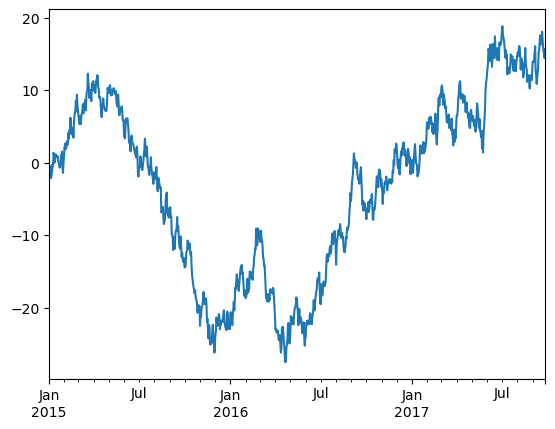

In [186]:
s = s.cumsum()
s.plot()

In [188]:
# 길이가 30인 이동 윈도우 객체를 생성합니다 (현재 시점 포함 이전 29개 값).
r = s.rolling(window=30)
r.mean()

2015-01-01          NaN
2015-01-02          NaN
2015-01-03          NaN
2015-01-04          NaN
2015-01-05          NaN
                ...    
2017-09-22    13.986923
2017-09-23    14.095201
2017-09-24    14.207961
2017-09-25    14.347321
2017-09-26    14.475746
Freq: D, Length: 1000, dtype: float64

<Axes: >

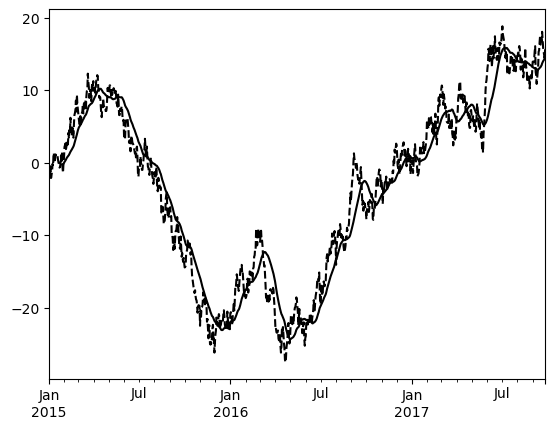

In [190]:
# 이동평균 
s.plot(style='k--')
r.mean().plot(style='k')

In [196]:
# 2015-01-01부터 시작하여 1000일간의 날짜 인덱스를 생성하고, 표준정규분포를 따르는 랜덤 값 1000×4개로 DataFrame을 만들며, 
# 열 이름을 'A', 'B', 'C', 'D'로 지정합니다.
df = pd.DataFrame(np.random.randn(1000, 4),
                  index=pd.date_range('1/1/2015', periods=1000),
                  columns=['A', 'B', 'C', 'D'])

# 각 열에 대해 누적 합을 계산하여 이전 값들이 더해진 형태로 업데이트합니다.
df = df.cumsum()

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

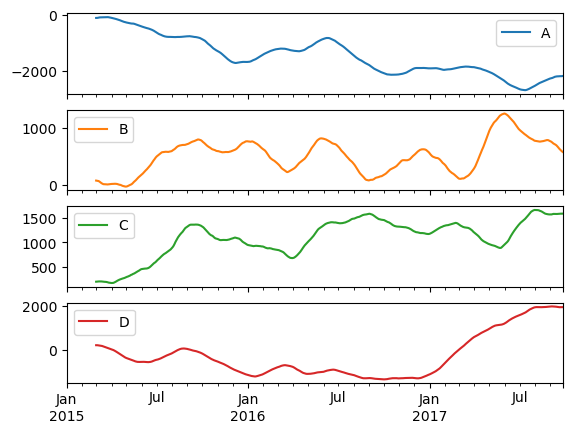

In [200]:
# 길이 60의 이동 윈도우로 합계를 계산한 뒤, 각 열을 별도의 서브플롯으로 그립니다.
df.rolling(window=60).sum().plot(subplots=True)

<Axes: >

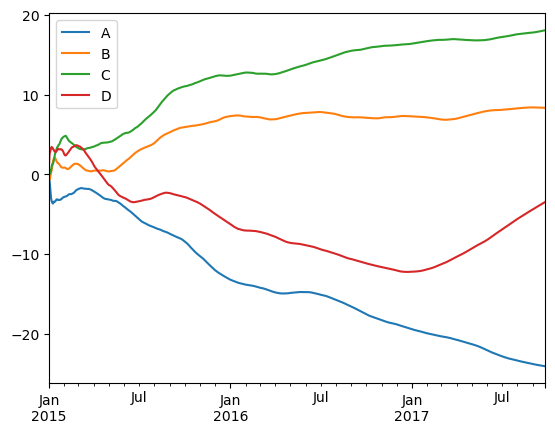

In [204]:
# 최소 1개 관측치부터 확장 윈도우를 적용해 누적 평균을 계산하고, 그 결과를 플롯합니다.
df.expanding(min_periods=1).mean().plot()

In [206]:
df.expanding?

Signature:
df.expanding(
    min_periods: 'int' = 1,
    axis: 'Axis | lib.NoDefault' = <no_default>,
    method: "Literal['single', 'table']" = 'single',
) -> 'Expanding'
Docstring:
Provide expanding window calculations.

Parameters
----------
min_periods : int, default 1
    Minimum number of observations in window required to have a value;
    otherwise, result is ``np.nan``.

axis : int or str, default 0
    If ``0`` or ``'index'``, roll across the rows.

    If ``1`` or ``'columns'``, roll across the columns.

    For `Series` this parameter is unused and defaults to 0.

method : str {'single', 'table'}, default 'single'
    Execute the rolling operation per single column or row (``'single'``)
    or over the entire object (``'table'``).

    This argument is only implemented when specifying ``engine='numba'``
    in the method call.

    .. versionadded:: 1.3.0

Returns
-------
pandas.api.typing.Expanding

See Also
--------
rolling : Provides rolling window calculations.
ewm : Pr

<Axes: >

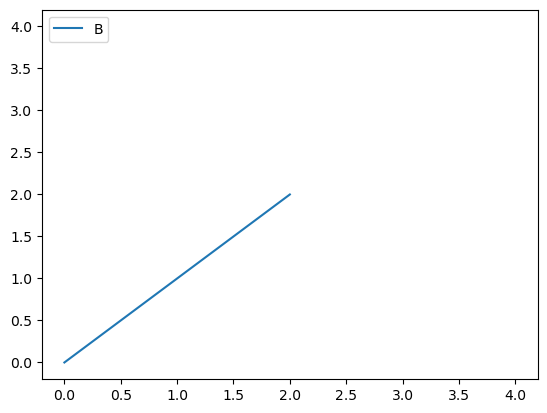

In [208]:
dfe = pd.DataFrame({'B': [0, 1, 2, np.nan, 4]})
dfe.plot()

<Axes: >

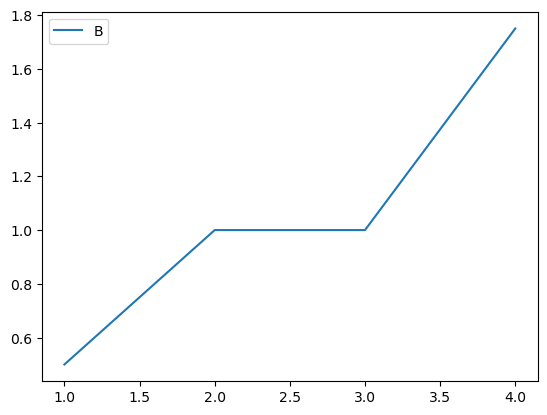

In [212]:
# 최소 2개 이상의 관측치를 기준으로 확장 윈도우를 적용해 누적 평균을 계산하고, 그 결과를 플롯합니다.
dfe.expanding(2).mean().plot()